# HD211847 1

In [1]:
from mingle.utilities.db_utils import SingleSimReader, DBExtractor, df_contour
import matplotlib.pyplot as plt
%matplotlib inline
from mingle.utilities.param_file import parse_paramfile

In [2]:
# chi2 = "coadd_chi2"
# chi2 = "chi2_1"
chi2 = "chi2_2"

In [3]:
starname = "HD211847"
obsnums = [1, 2]
rvs = [6.6137, 6.6137]
gammas = [7.171, 7.167]

In [4]:
!cat ~/Desktop/Inbox/a/tuned/paper-HD211847/HD211847.sh 

cat: /home/jneal/Desktop/Inbox/a/tuned/paper-HD211847/HD211847.sh: No such file or directory


In [5]:
correct = parse_paramfile("/home/jneal/Phd/data/parameter_files/HD211847_params.dat")
correct.update({"teff_1":correct["temp"], "teff_2":correct["comp_temp"],
                "logg_1":correct["logg"], "logg_2":correct["comp_logg"],
                "feh_1":correct["fe_h"], "feh_2":correct["comp_fe_h"], "gamma":6.613, "rv":7.169-6.613})
print(correct)
print("Host temp =", correct["temp"], "K,\tEstimated companion =", correct["comp_temp"], "K")

{'name': 'hd 211847', 'companion': 'b', 'mean_val': 6.689, 'k1': 0.2914, 'omega': 159.2, 'eccentricity': 0.685, 'tau': 62030.1, 'period': 7929.4, 'm_star': 0.94, 'msini': 19.2, 'a': 7.5, 'm_true': 155.0, 'spt': 'g5v', 'temp': 5715.0, 'fe_h': -0.08, 'logg': 4.49, 'i': 7.0, 'dist': 50.6, 'age': 3.0, 'comp_temp': 3140.0, 'comp_logg': 5.13, 'comp_fe_h': -0.08, 'source': ['moutou et. al. 2017', 'sahlmann et. al. 2011', 'https://arxiv.org/pdf/1701.05664.pdf'], 'teff_1': 5715.0, 'teff_2': 3140.0, 'logg_1': 4.49, 'logg_2': 5.13, 'feh_1': -0.08, 'feh_2': -0.08, 'gamma': 6.613, 'rv': 0.5559999999999992}
Host temp = 5715.0 K,	Estimated companion = 3140.0 K


# Observation 1 - BHM

########################
Observation # 1 
########################
{'logg_1': 4.5, 'feh_1': 0.0}
(256, 5)


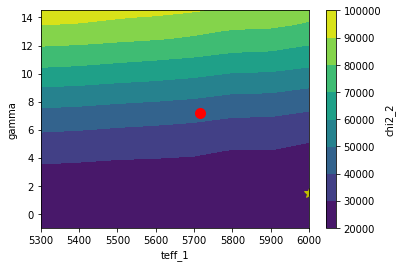

Min Chi2 result for obs= 1
   teff_1  logg_1  gamma  feh_1        chi2_2
0    6000     4.5    1.5    0.0  23470.331682
########################
Observation # 2 
########################
{'logg_1': 4.5, 'feh_1': 0.0}
(256, 5)


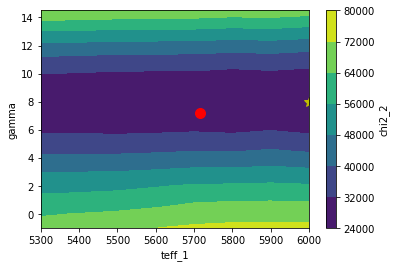

Min Chi2 result for obs= 2
   teff_1  logg_1  gamma  feh_1        chi2_2
0    6000     4.5    8.0    0.0  25253.729255


In [6]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="bhm", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())
    
    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


# Observation 1 - IAM


########################
Observation # 1 
########################
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 9)


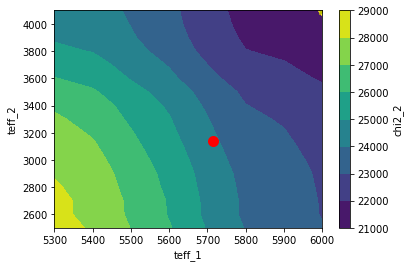

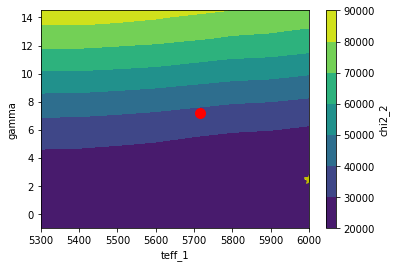

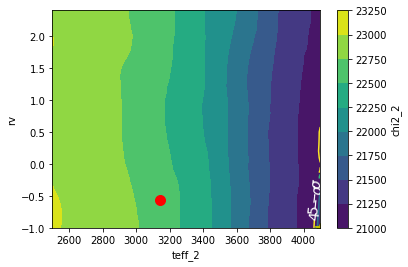

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  151208    4100     5.0    0.0   0.0847     844 -1.0    2.5  38459.8212   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.0875     763  22885.6852       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  105620.7781        3335  6000.0     4.5    0.0  

[1 rows x 27 columns]
########################
Observation # 2 
########################
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 9)


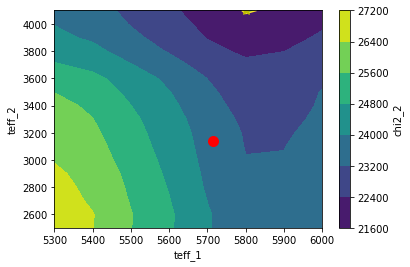

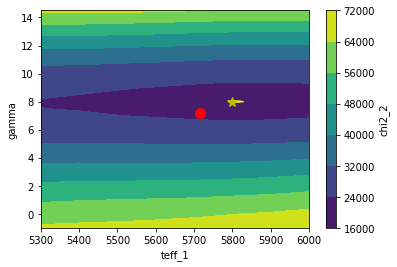

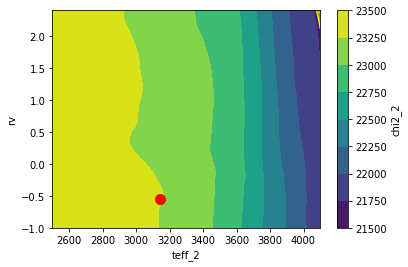

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  114227    4100     5.0    0.0   0.0941     829  2.4    8.0  19947.2036   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.0963     655  30079.7796       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  110881.0007        3160  5800.0     4.5    0.0  

[1 rows x 27 columns]


In [7]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="iam", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


## HD211847 with larger Teff 2 values



In [8]:
base = "/home/jneal/Phd/Analysis/Paper_results/paper-{}_higher-temp".format(starname)

#### Observation 1 - BHM

########################
Observation # 1 
########################
{'logg_1': 4.5, 'feh_1': 0.0}
(384, 5)


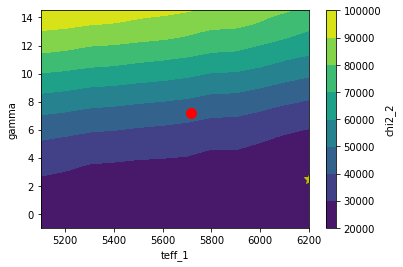

Min Chi2 result for obs= 1
   teff_1  logg_1  gamma  feh_1        chi2_2
0    6200     4.5    2.5    0.0  22379.163417
########################
Observation # 2 
########################
{'logg_1': 4.5, 'feh_1': 0.0}
(384, 5)


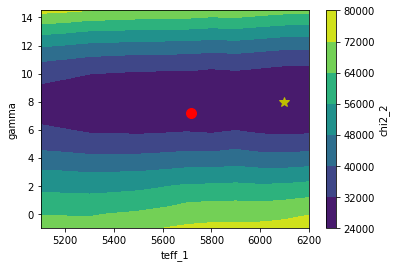

Min Chi2 result for obs= 2
   teff_1  logg_1  gamma  feh_1        chi2_2
0    6100     4.5    8.0    0.0  24509.542367


In [9]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="bhm", suffix="*bhm2*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


#### Observation 1 - IAM


########################
Observation # 1 
########################
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(336000, 9)


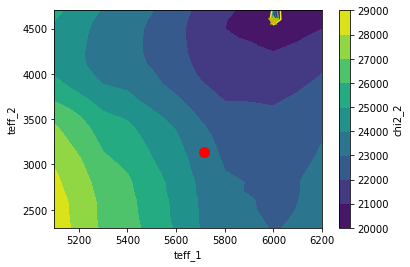

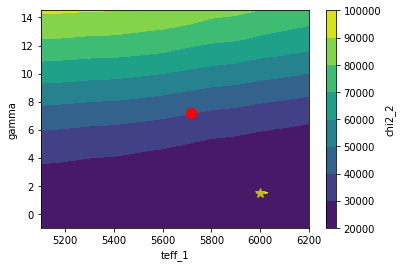

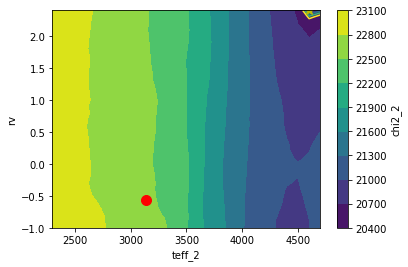

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  334854    4600     5.0    0.0   0.1361     844  2.4    1.5  40660.4909   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.1398     763  23409.7831       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  109230.1866        3335  6000.0     4.5    0.0  

[1 rows x 27 columns]
########################
Observation # 2 
########################
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(336000, 9)


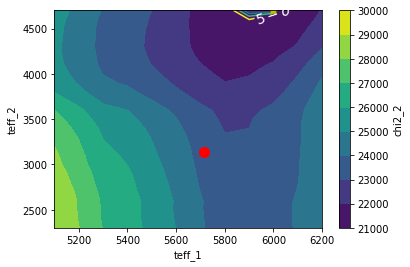

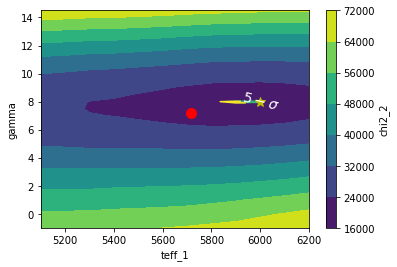

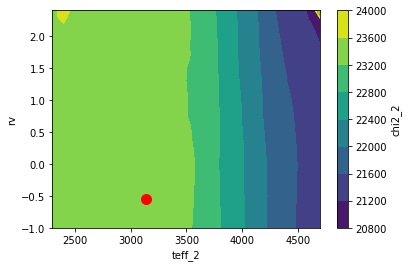

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  335987    4700     5.0    0.0   0.1462     829  2.4    8.0  19518.0851   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.1493     655  28446.9124       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  105427.0841        3160  6000.0     4.5    0.0  

[1 rows x 27 columns]


In [10]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="iam", suffix="*_2", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


# HD 211847 with larger RV span.



In [11]:
base = "/home/jneal/Phd/Analysis/Paper_results/paper-{}_wider_rv".format(starname)

#### Observation 1 - BHM

########################
Observation # 1 
########################
{'logg_1': 4.5, 'feh_1': 0.0}
(720, 5)


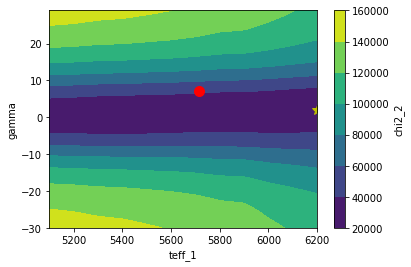

Min Chi2 result for obs= 1
   teff_1  logg_1  gamma  feh_1        chi2_2
0    6200     4.5      2    0.0  22551.700384
########################
Observation # 2 
########################
{'logg_1': 4.5, 'feh_1': 0.0}
(720, 5)


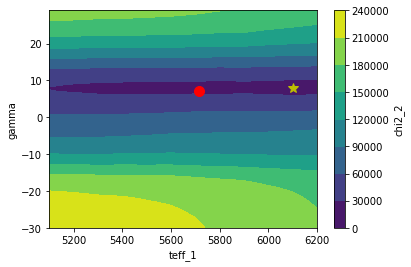

Min Chi2 result for obs= 2
   teff_1  logg_1  gamma  feh_1        chi2_2
0    6100     4.5      8    0.0  24509.542367


In [12]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="bhm", suffix="*_bhm2", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


#### Observation 1 - IAM


########################
Observation # 1 
########################
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 9)


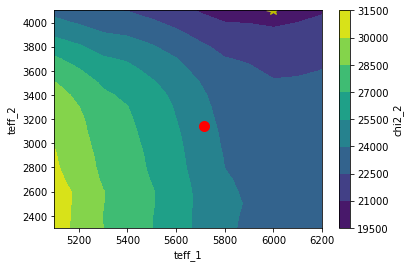

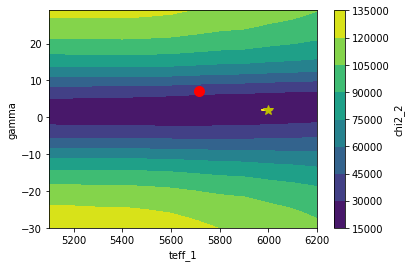

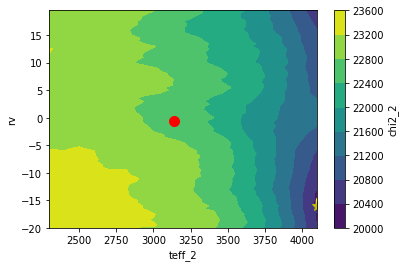

Min Chi2 result for obs= 1
     index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma      chi2_1  \
0  1090113    4100     5.0    0.0   0.0847     844 -16.0      2  41483.9747   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.0878     763  22416.0301       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  106453.2654        3335  6000.0     4.5    0.0  

[1 rows x 27 columns]
########################
Observation # 2 
########################
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 9)


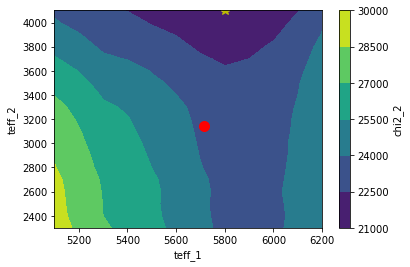

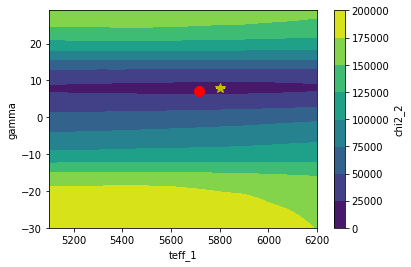

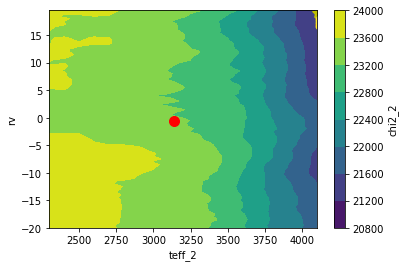

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma     chi2_1  \
0  911919    4100     5.0    0.0   0.0941     829  19.0      8  20291.111   

   arbnorm_1  ...    arbnorm_3  alpha_4  npix_4      chi2_4  arbnorm_4  \
0       1.02  ...         1.01   0.0964     655  28912.3234       1.01   

    coadd_chi2  coadd_npix  teff_1  logg_1  feh_1  
0  107973.5367        3160  5800.0     4.5    0.0  

[1 rows x 27 columns]


In [13]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="iam", suffix="*_2", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


/home/jneal/Phd/Codes/companion_simulations/bin/__init__.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/kern

KeyError: 'star'

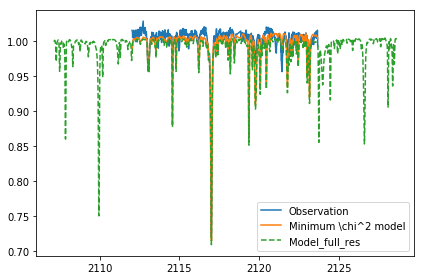

In [14]:
from bin.coadd_analysis_module import compare_spectra_dect1
correct.update({"obs_name":"/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits"})
compare_spectra_dect1(observation.get_table(), params=correct, save=True, chi2_val="chi2_1", mode="iam")

In [ ]:
!ls ~/.handy_spectra/HD211*-1*_1*mask*



# HD 211847 with even larger RV span.


In [ ]:
#paper-HD211847_even_higher_temp
base = "/home/jneal/Phd/Analysis/Paper_results/paper-{}_even_higher_temp".format(starname)
        /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_even_higher_temp/HD211847/bhm

In [ ]:
#### Observation 1 - BHM
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="bhm", suffix="*_bhm*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


In [ ]:
#### Observation 1 - IAM
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="iam", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  
